In [4]:
Ashley Bang

In [12]:
#!pip install --upgrade scikit-learn           previous version 1.6.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 3.0 MB/s  0:00:03 eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.2 which is incompatible.


In [2]:
pip install xgboost==3.1.2 --no-cache-dir

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 3.8 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error


In [2]:
data_fin_imprt=pd.read_csv("final_from_df2.csv",  delimiter=',')



In [3]:
data_fin_imprt.head(15)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [10]:
x1=data_fin_imprt.drop('SalePrice',axis=1)
x=pd.get_dummies(x1)
y=data_fin_imprt['SalePrice']
x_train1, x_test1, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
x_train = pd.get_dummies(x_train1)
x_test = pd.get_dummies(x_test1)

# Align columns in case train/test have different dummy columns
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

xgb_mod = xgb.XGBRegressor()
#xgb_mod.fit(x_train, y_train)
#xgb_pred = xgb_mod.predict(x_test)
xgb_mod.fit(x_train, y_train)
xgb_pred = xgb_mod.predict(x_test)

In [15]:
xgb_mod_sc=xgb_mod.score(x_train,y_train)
print('XGB Regression Model Score  : ',round(xgb_mod_sc,3))
r2=r2_score(y_test,xgb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,3))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,xgb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
#lin_rmse=mean_squared_error(y_test,xgb_pred,squared = False)
lin_rmse=mean_squared_error(y_test,xgb_pred)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, xgb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(xgb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model

XGB Regression Model Score  :  1.0
R Sq. Value :  0.905
Adjusted R Sq. Value is :  0.884
Mean Square Error is :  729342720.0
Root Mean Square Error is :  729342720.0
Mean Absoulue Error is :  16860.799
Accuracy : 86.55 %


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/3y/2ljzqtk171sg5czh9c7g76b80000gn/T/ipykernel_44375/712411232.py:2: RuntimeWarning: overflow encountered in expm1
  Predicted_Price=np.expm1(xgb_pred)


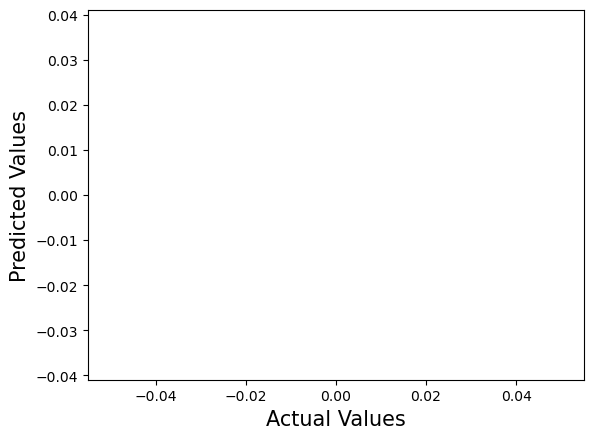

In [27]:


Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(xgb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

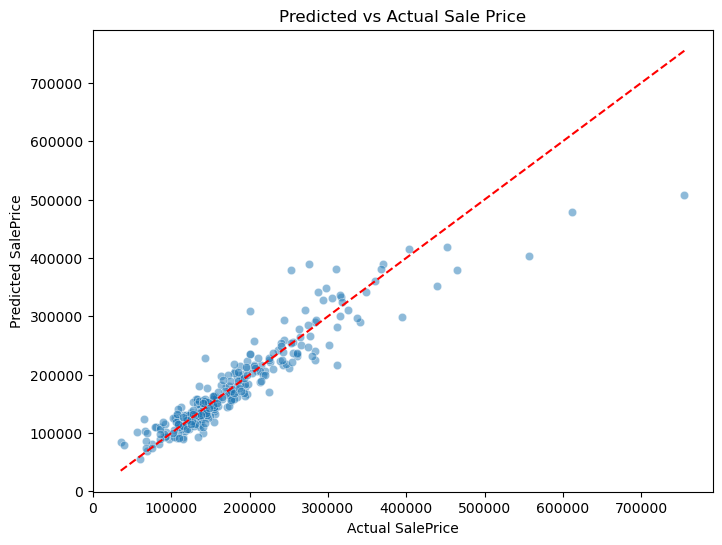

In [29]:
plt.figure(figsize=(8,6))
sb.scatterplot(x=y_test, y=xgb_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual Sale Price")

plt.savefig("xgb_plot.png", dpi=300)
plt.show()

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


/var/folders/3y/2ljzqtk171sg5czh9c7g76b80000gn/T/ipykernel_44375/2667354503.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-xgb_pred),bins=100);


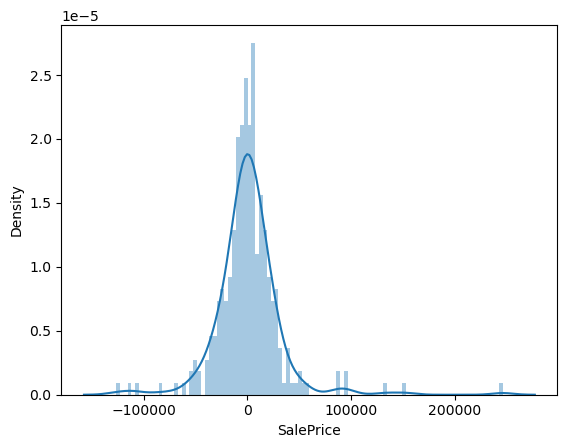

In [26]:
sb.distplot((y_test-xgb_pred),bins=100); 

plt.savefig("xgb_plot.png", dpi=300)

In [18]:
params = {
        'objective' : ['reg:squarederror','reg:linear'],
        'min_child_weight': [1,2],
        'gamma': [0.5, 1],
        'subsample': [0.2, 0.4],
        'max_depth': [1, 2]
        }

In [19]:
# G_CV_lin_rid = GridSearchCV(estimator=xgb_mod, param_grid=params, cv= 5) 
# #  using grid search method to optimise model with hyperparameter tuning

# G_CV_lin_rid.fit(x_train, y_train)# fitting the model
# G_CV_lin_rid.best_params_ # displaying optimised parameters for optimal tuning of model

{'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 10, 'subsample': 0.6}

In [20]:
xgb_mod = xgb.XGBRegressor(objective="reg:squarederror", max_depth=10,gamma=0.001,min_child_weight=50,subsample=1)
xgb_mod.fit(x_train, y_train)
xgb_pred = xgb_mod.predict(x_test)

In [22]:
xgb_mod_sc=xgb_mod.score(x_train,y_train)
print('XGB Regression Model Score  : ',round(xgb_mod_sc,3))
r2=r2_score(y_test,xgb_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,xgb_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_rmse=mean_squared_error(y_test,xgb_pred)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, xgb_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(xgb_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

XGB Regression Model Score  :  0.978
R Sq. Value :  0.87
Adjusted R Sq. Value is :  0.836
Mean Square Error is :  1027055488.0
Root Mean Square Error is :  1027055488.0
Mean Absoulue Error is :  19321.236
Accuracy : 86.22 %


/opt/anaconda3/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in expm1
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/3y/2ljzqtk171sg5czh9c7g76b80000gn/T/ipykernel_44375/712411232.py:2: RuntimeWarning: overflow encountered in expm1
  Predicted_Price=np.expm1(xgb_pred)


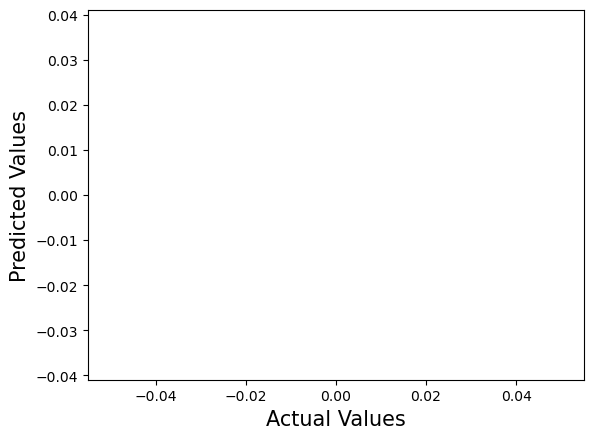

In [23]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(xgb_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

/var/folders/3y/2ljzqtk171sg5czh9c7g76b80000gn/T/ipykernel_44375/1214406521.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-xgb_pred),bins=100);


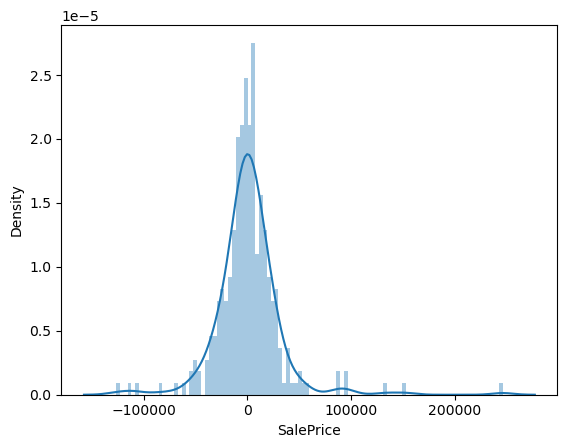

In [24]:
sb.distplot((y_test-xgb_pred),bins=100); 

<Axes: >

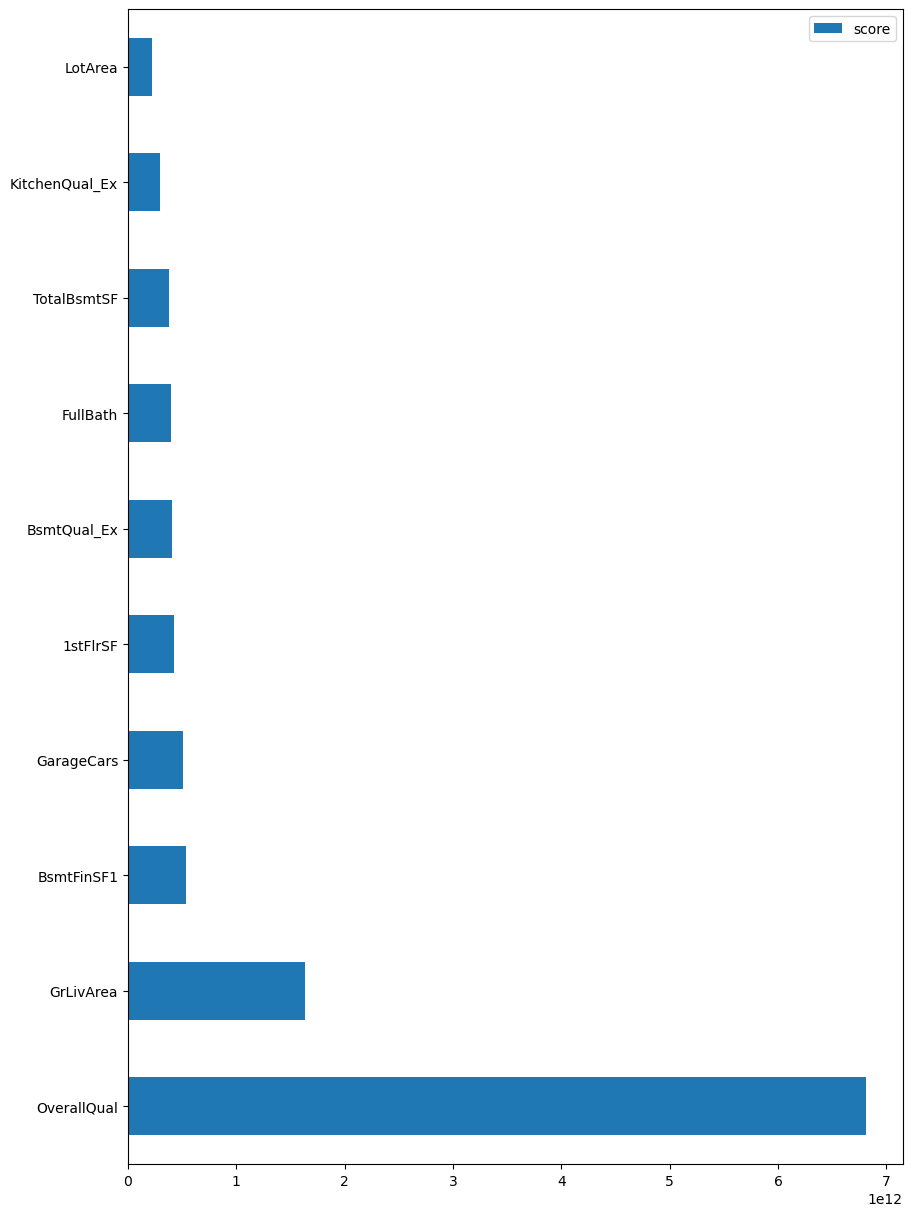

In [25]:
feature_important = xgb_mod.get_booster().get_score(importance_type='total_gain')


keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(10, columns="score").plot(kind='barh', figsize = (10,15)) ## plot top 10 features